# Fire Evacuation Planning for the MI Building

Due to the increasing amount of students at the Technical University of Munich, the fire evacuation plan
for the MI building needs to be reconsidered. An important information is the distribution of people within the
MI building p(x).<br>
In a hypothetical scenario, the fire department decided to track 100 random students and employees during
the busiest hour on different days. The idea is to use this data for learning p(x). As a first experiment, the
fire department wants to estimate the number of people that is critical for the building. To simplify the task,
it defined a sensitive area in front of the main entrance—marked by the orange rectangle (130/70 & 150/50)—
where the number of people should not exceed 100. You will get points for this task if you document the
experiments.


In [1]:
# For automatic file reloading
%load_ext autoreload
%autoreload 2
%matplotlib inline

### We import the neccessary libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from exercise_code.VAE import VAE
from exercise_code.sampling import Sampling
from exercise_code.task_4_plots import plot_reconstructed_test_set, plot_generated_samples

### Set all the required parameters

In [3]:
parameters = {
    "input_shape": (28, 28, 1),
    "output_shape": 784,
    "intermediate_layers": 256,
    "latent_dim": 2,
    "adam_learning_rate": 0.005,
    "batch_size": 64,
    "epochs": 200
}

### Build the encoder

In [4]:
# Encoder network
encoder_inputs = keras.Input(shape=(2,1))
X = layers.Flatten(name="Flatten")(encoder_inputs) 
x = layers.Dense(64, activation="relu")(X)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(parameters["latent_dim"], name="z_mean")(x)
z_log_var = layers.Dense(parameters["latent_dim"], name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 1)]       0           []                               
                                                                                                  
 Flatten (Flatten)              (None, 2)            0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['Flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]']                  
                                                                                            

### Build the decoder

In [5]:
# Decoder network
latent_inputs = keras.Input(shape=(parameters["latent_dim"],))
x = layers.Dense(64, activation="relu")(latent_inputs)
x = layers.Dense(64, activation="relu")(x)
decoder_outputs = layers.Dense(2, activation="linear")(x)
decoder_outputs = layers.Reshape((2, 1), name="Reshape")(decoder_outputs)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()     

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 64)                192       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
 Reshape (Reshape)           (None, 2, 1)              0         
                                                                 
Total params: 4,482
Trainable params: 4,482
Non-trainable params: 0
_________________________________________________________________


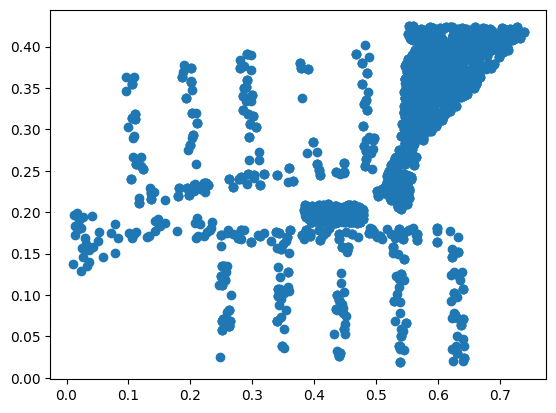

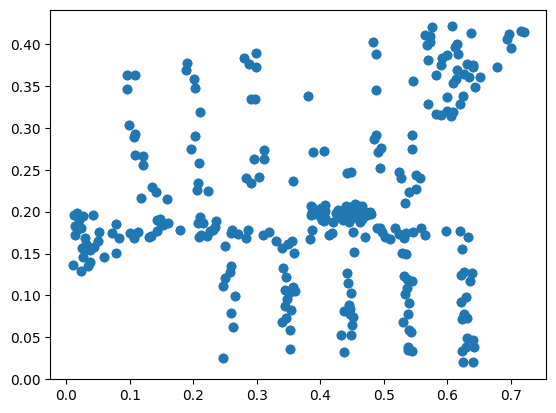

In [6]:
# Load the train dataset from the .npy file
train_set = np.load('../../FireEvac_train_set.npy')

# Load the test dataset from the .npy file
test_set = np.load('../../FireEvac_test_set.npy')

# Normalize data
x_train = np.expand_dims(train_set, -1).astype("float32") / 255 
x_test = np.expand_dims(test_set, -1).astype("float32") / 255

plt.scatter(x_train[:,0], x_train[:,1]);
plt.show()
plt.scatter(x_test[:,0], x_test[:,1]);
plt.show()

In [7]:
# Create an instance of the VAE class
vae = VAE(encoder, decoder, scale=2*1)

# Compile and train the model
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=parameters["adam_learning_rate"]))
vae.fit(x_train, epochs=parameters["epochs"], batch_size=parameters["batch_size"])

Epoch 1/200
47/47 [==============================] - 1s 2ms/step - loss: 2.1888 - reconstruction_loss: 1.6100 - kl_loss: 0.0237
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 1.3038 - reconstruction_loss: 1.3002 - kl_loss: 5.5420e-04
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2993 - reconstruction_loss: 1.2973 - kl_loss: 1.8713e-05
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2971 - reconstruction_loss: 1.2971 - kl_loss: 1.4368e-05
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2971 - reconstruction_loss: 1.2974 - kl_loss: 1.1148e-05
Epoch 6/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2976 - reconstruction_loss: 1.2968 - kl_loss: 1.5166e-05
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2973 - reconstruction_loss: 1.2976 - kl_loss: 1.9245e-05
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2977 

47/47 [==============================] - 0s 1ms/step - loss: 1.2959 - reconstruction_loss: 1.2960 - kl_loss: 4.0411e-06
Epoch 63/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2988 - reconstruction_loss: 1.2962 - kl_loss: 3.9497e-06
Epoch 64/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2930 - reconstruction_loss: 1.2957 - kl_loss: 2.3801e-06
Epoch 65/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2956 - reconstruction_loss: 1.2964 - kl_loss: 2.2269e-06
Epoch 66/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2963 - reconstruction_loss: 1.2960 - kl_loss: 2.0676e-06
Epoch 67/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2968 - reconstruction_loss: 1.2958 - kl_loss: 2.8276e-06
Epoch 68/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2950 - reconstruction_loss: 1.2962 - kl_loss: 3.2449e-06
Epoch 69/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2957 -

47/47 [==============================] - 0s 1ms/step - loss: 1.2957 - reconstruction_loss: 1.2956 - kl_loss: 6.4304e-08
Epoch 124/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2940 - reconstruction_loss: 1.2959 - kl_loss: 9.1386e-08
Epoch 125/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2942 - reconstruction_loss: 1.2956 - kl_loss: 1.3701e-07
Epoch 126/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2947 - reconstruction_loss: 1.2958 - kl_loss: 1.0149e-07
Epoch 127/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2953 - reconstruction_loss: 1.2958 - kl_loss: 1.1513e-07
Epoch 128/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2945 - reconstruction_loss: 1.2960 - kl_loss: 1.4357e-07
Epoch 129/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2953 - reconstruction_loss: 1.2957 - kl_loss: 2.2135e-07
Epoch 130/200
47/47 [==============================] - 0s 1ms/step - loss: 1

47/47 [==============================] - 0s 1ms/step - loss: 1.2945 - reconstruction_loss: 1.2955 - kl_loss: 1.1184e-08
Epoch 185/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2990 - reconstruction_loss: 1.2955 - kl_loss: 1.6490e-07
Epoch 186/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2953 - reconstruction_loss: 1.2954 - kl_loss: 5.9584e-08
Epoch 187/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2946 - reconstruction_loss: 1.2954 - kl_loss: 9.7286e-09
Epoch 188/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2950 - reconstruction_loss: 1.2955 - kl_loss: 8.4902e-09
Epoch 189/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2965 - reconstruction_loss: 1.2956 - kl_loss: 6.9007e-09
Epoch 190/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2965 - reconstruction_loss: 1.2954 - kl_loss: 5.7542e-09
Epoch 191/200
47/47 [==============================] - 0s 1ms/step - loss: 1

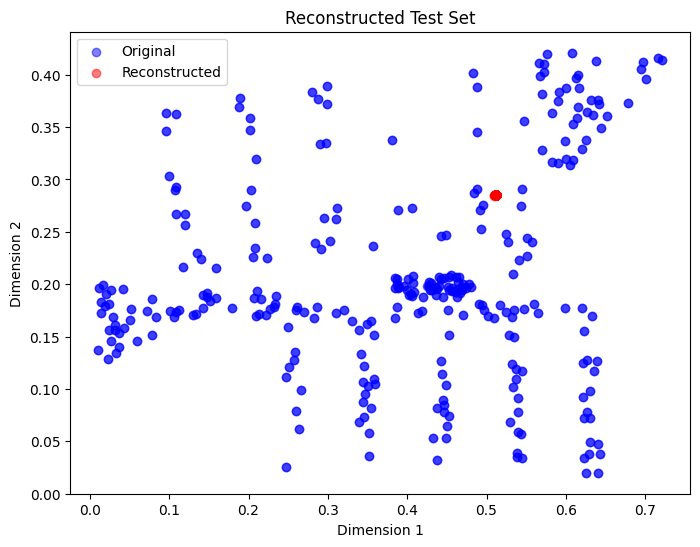

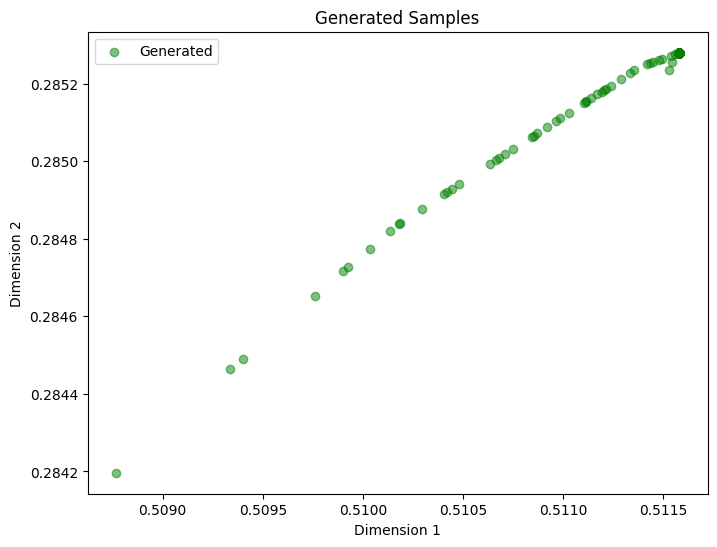

In [8]:
plot_reconstructed_test_set(vae, x_test)
plot_generated_samples(vae, parameters['latent_dim'])